# Цели и задачи проекта

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска. Задача - построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. Провести разведывательный анализ данных и составить отчёт по его результатам. 

## Первичный отсмотр данных
   Импортируем нужные для чтения и первичного анализа библиотеки и прочитаем файл:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import numpy as np

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

In [6]:
import warnings; warnings.simplefilter('ignore')

In [7]:
df = pd.read_csv('stud_math.csv')

Рассмотрим, какие данные хранятся в файле и какие типы данных у столбцов:

In [8]:
display(df.head())

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Итак в датасете 30 столбцов. Из них числовые с плавающей точкой - 12, чичловой - 1 столбец и категориальныу 17 столбцов. 


In [10]:
df.select_dtypes(int)

""
0
1
2
3
4
...
390
391
392
393


Это столбец с индексами. Однако из всех числовых столбцов 8 столбцов мы не можем отнести к числовым, так как это категориям присвоены числовые признаки: столбцы([7]Medu — образование матери, 8 Fedu — образование отца, 13 traveltime — время в пути до школы, 14 studytime — время на учёбу помимо школы в неделю, 25 famrel — семейные отношения, 26 freetime — свободное время после школы, 27 goout — проведение времени с друзьями, 28 health — текущее состояние здоровья)


<AxesSubplot:>

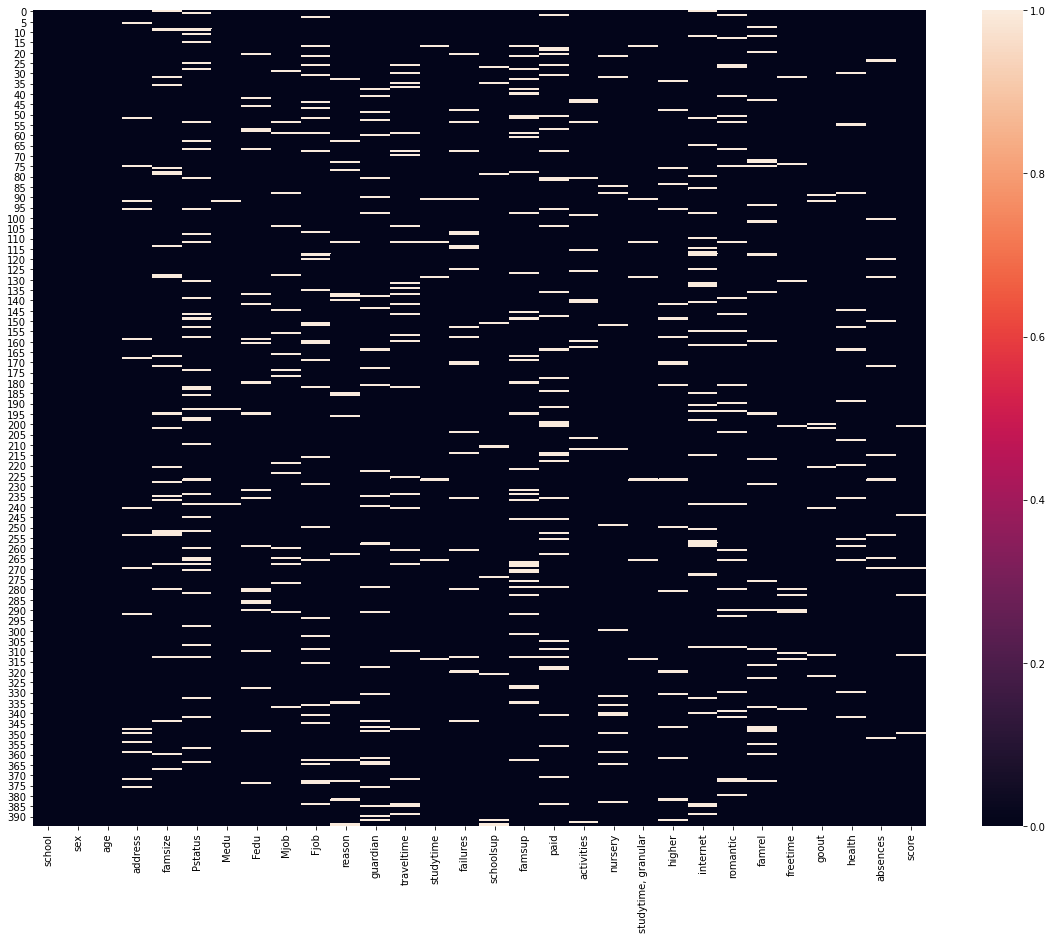

In [11]:
plt.figure(figsize=(20,15))  #тепловая карта пропущеных значений
sns.heatmap(df.isnull())

In [12]:
df.isna().mean()

school                 0.000000
sex                    0.000000
age                    0.000000
address                0.043038
famsize                0.068354
Pstatus                0.113924
Medu                   0.007595
Fedu                   0.060759
Mjob                   0.048101
Fjob                   0.091139
reason                 0.043038
guardian               0.078481
traveltime             0.070886
studytime              0.017722
failures               0.055696
schoolsup              0.022785
famsup                 0.098734
paid                   0.101266
activities             0.035443
nursery                0.040506
studytime, granular    0.017722
higher                 0.050633
internet               0.086076
romantic               0.078481
famrel                 0.068354
freetime               0.027848
goout                  0.020253
health                 0.037975
absences               0.030380
score                  0.015190
dtype: float64

Итак больше всего пропущено значений в колонках Pstatus (статус совместного жилья родителей),  paid(дополнительные платные занятия по математике) и   famsup(семейная образовательная поддержка).


In [13]:
df['absences'] = df['absences'].apply(lambda x: df['absences'].median() if pd.isna(x)== True else x) 
# Заменим пропуски на среднее значение

In [14]:
df['score'] = df['score'].apply(lambda x: df['score'].median() if pd.isna(x)== True else x) 
# Заменим пропуски на среднее значение

In [16]:
def change_none(column):  # Сразу заменим пропуски на None в числовых столбцах
    df[column] = df[column].apply(lambda x: None
                                  if pd.isna(x) == True else x)


column_list = df.select_dtypes(
    include='number').columns  # перечень числовых столбцов 
for column in column_list:
    change_none(column)

In [17]:
def change_none_obj(column):  # Сразу заменим пропуски на None в категориальных  столбцах
    df[column] = df[column].apply(lambda x: None
                                  if pd.isna(x) == True else x)


columns_list = df.select_dtypes(
    include='object').columns  # перечень числовых столбцовfor column in column_list:
for column in columns_list:
    change_none_obj(column)

In [18]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


Cтолбец с возрастом бе пропусков.

In [19]:
df.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

In [21]:
df.sex.value_counts()

F    208
M    187
Name: sex, dtype: int64

И девушек и парней по количеству разница небольшая.

In [22]:
numerical= df[[col for col in df.columns if df[col].dtype == 'float']] #создаем список числовых столбцов
categorical = df[[col for col in df.columns if df[col].dtype == 'object']] #создаем список категориальных столбцов

проверим на выбросы:

array([[<AxesSubplot:title={'center':'Medu'}>,
        <AxesSubplot:title={'center':'Fedu'}>,
        <AxesSubplot:title={'center':'traveltime'}>,
        <AxesSubplot:title={'center':'studytime'}>],
       [<AxesSubplot:title={'center':'failures'}>,
        <AxesSubplot:title={'center':'studytime, granular'}>,
        <AxesSubplot:title={'center':'famrel'}>,
        <AxesSubplot:title={'center':'freetime'}>],
       [<AxesSubplot:title={'center':'goout'}>,
        <AxesSubplot:title={'center':'health'}>,
        <AxesSubplot:title={'center':'absences'}>,
        <AxesSubplot:title={'center':'score'}>]], dtype=object)

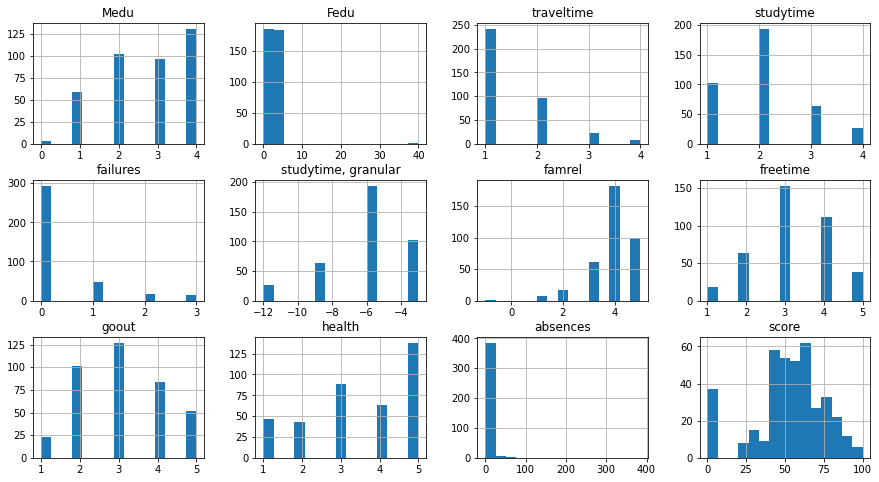

In [23]:
numerical.hist(bins=15, figsize=(15, 8), layout=(3, 4))

In [24]:
df.Fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Так как 40 это опечатка то удаляю ее из датафрейма:


In [25]:
df = df.drop(df[df.Fedu == 40].index)

In [26]:
df.shape

(394, 30)

In [27]:
df.famrel.value_counts()

 4.0    182
 5.0     98
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Устраняем выброс (явную ошыбку):

In [28]:
df = df.drop(df[df.famrel == -1.0].index)

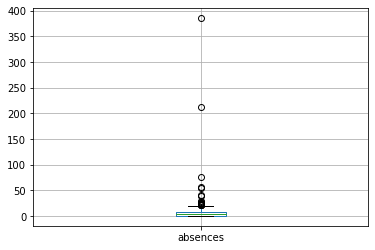

In [29]:
boxplot = df.boxplot(column='absences') 

В колонке отсутствия есть явные выбросы. Установим их с помошью формулы интерквартильного расстояния (межквартильного размаха):

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


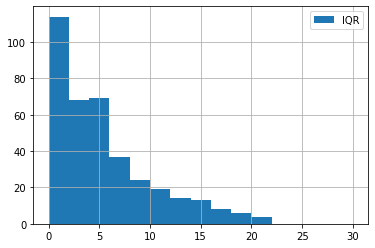

In [30]:
IQR = df.absences.quantile(0.75) - df.absences.quantile(0.25)
perc25 = df.absences.quantile(0.25)
perc75 = df.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df.absences.loc[df.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 15, range = (0, 30), label = 'IQR')

plt.legend();

In [31]:
df = df.loc[df.absences <= 20] # Устраняем из датафрейма выбросы ро колонке absences

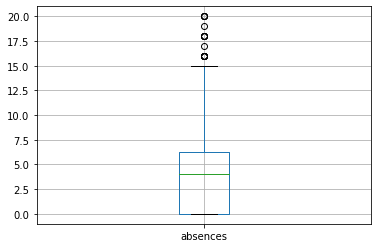

In [25]:
boxplot = df.boxplot(column='absences')

## Кореляционный анализ

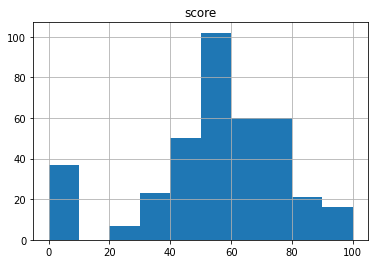

In [32]:
hist = df.hist(column='score')

Итак есть ученики, которые не явились на экзамен. Это могут быть ученики не пришедшие на экзамен, не допушеные.\
Проверим гипотезу: не пришедшие на экзамен ученики - те, у которых много пропусков. 
    

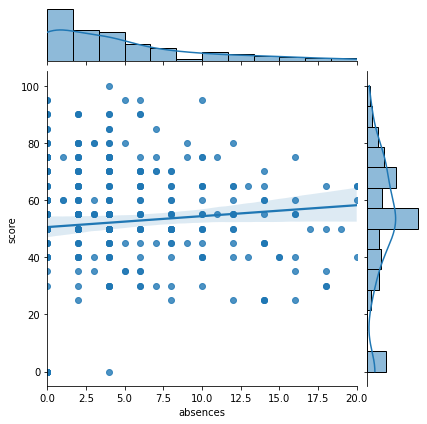

In [33]:
sns.jointplot(x='absences', y='score', data=df, kind='reg')

Итак, присутствие не гарантирует высокой оценки и не связаны явно с самой низкой оценкой. Тем не менее у чаще отсутствующих высоких балов меньше.

In [34]:
df[df.score>df.score.mean()].absences.value_counts() 

0.0     52
2.0     39
4.0     36
6.0     20
8.0      9
10.0     9
12.0     7
3.0      6
14.0     5
7.0      4
16.0     4
20.0     3
1.0      3
11.0     2
5.0      2
9.0      2
18.0     1
13.0     1
Name: absences, dtype: int64

Выясним, какие столбцы коррелируют с оценкой школьников. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить. 

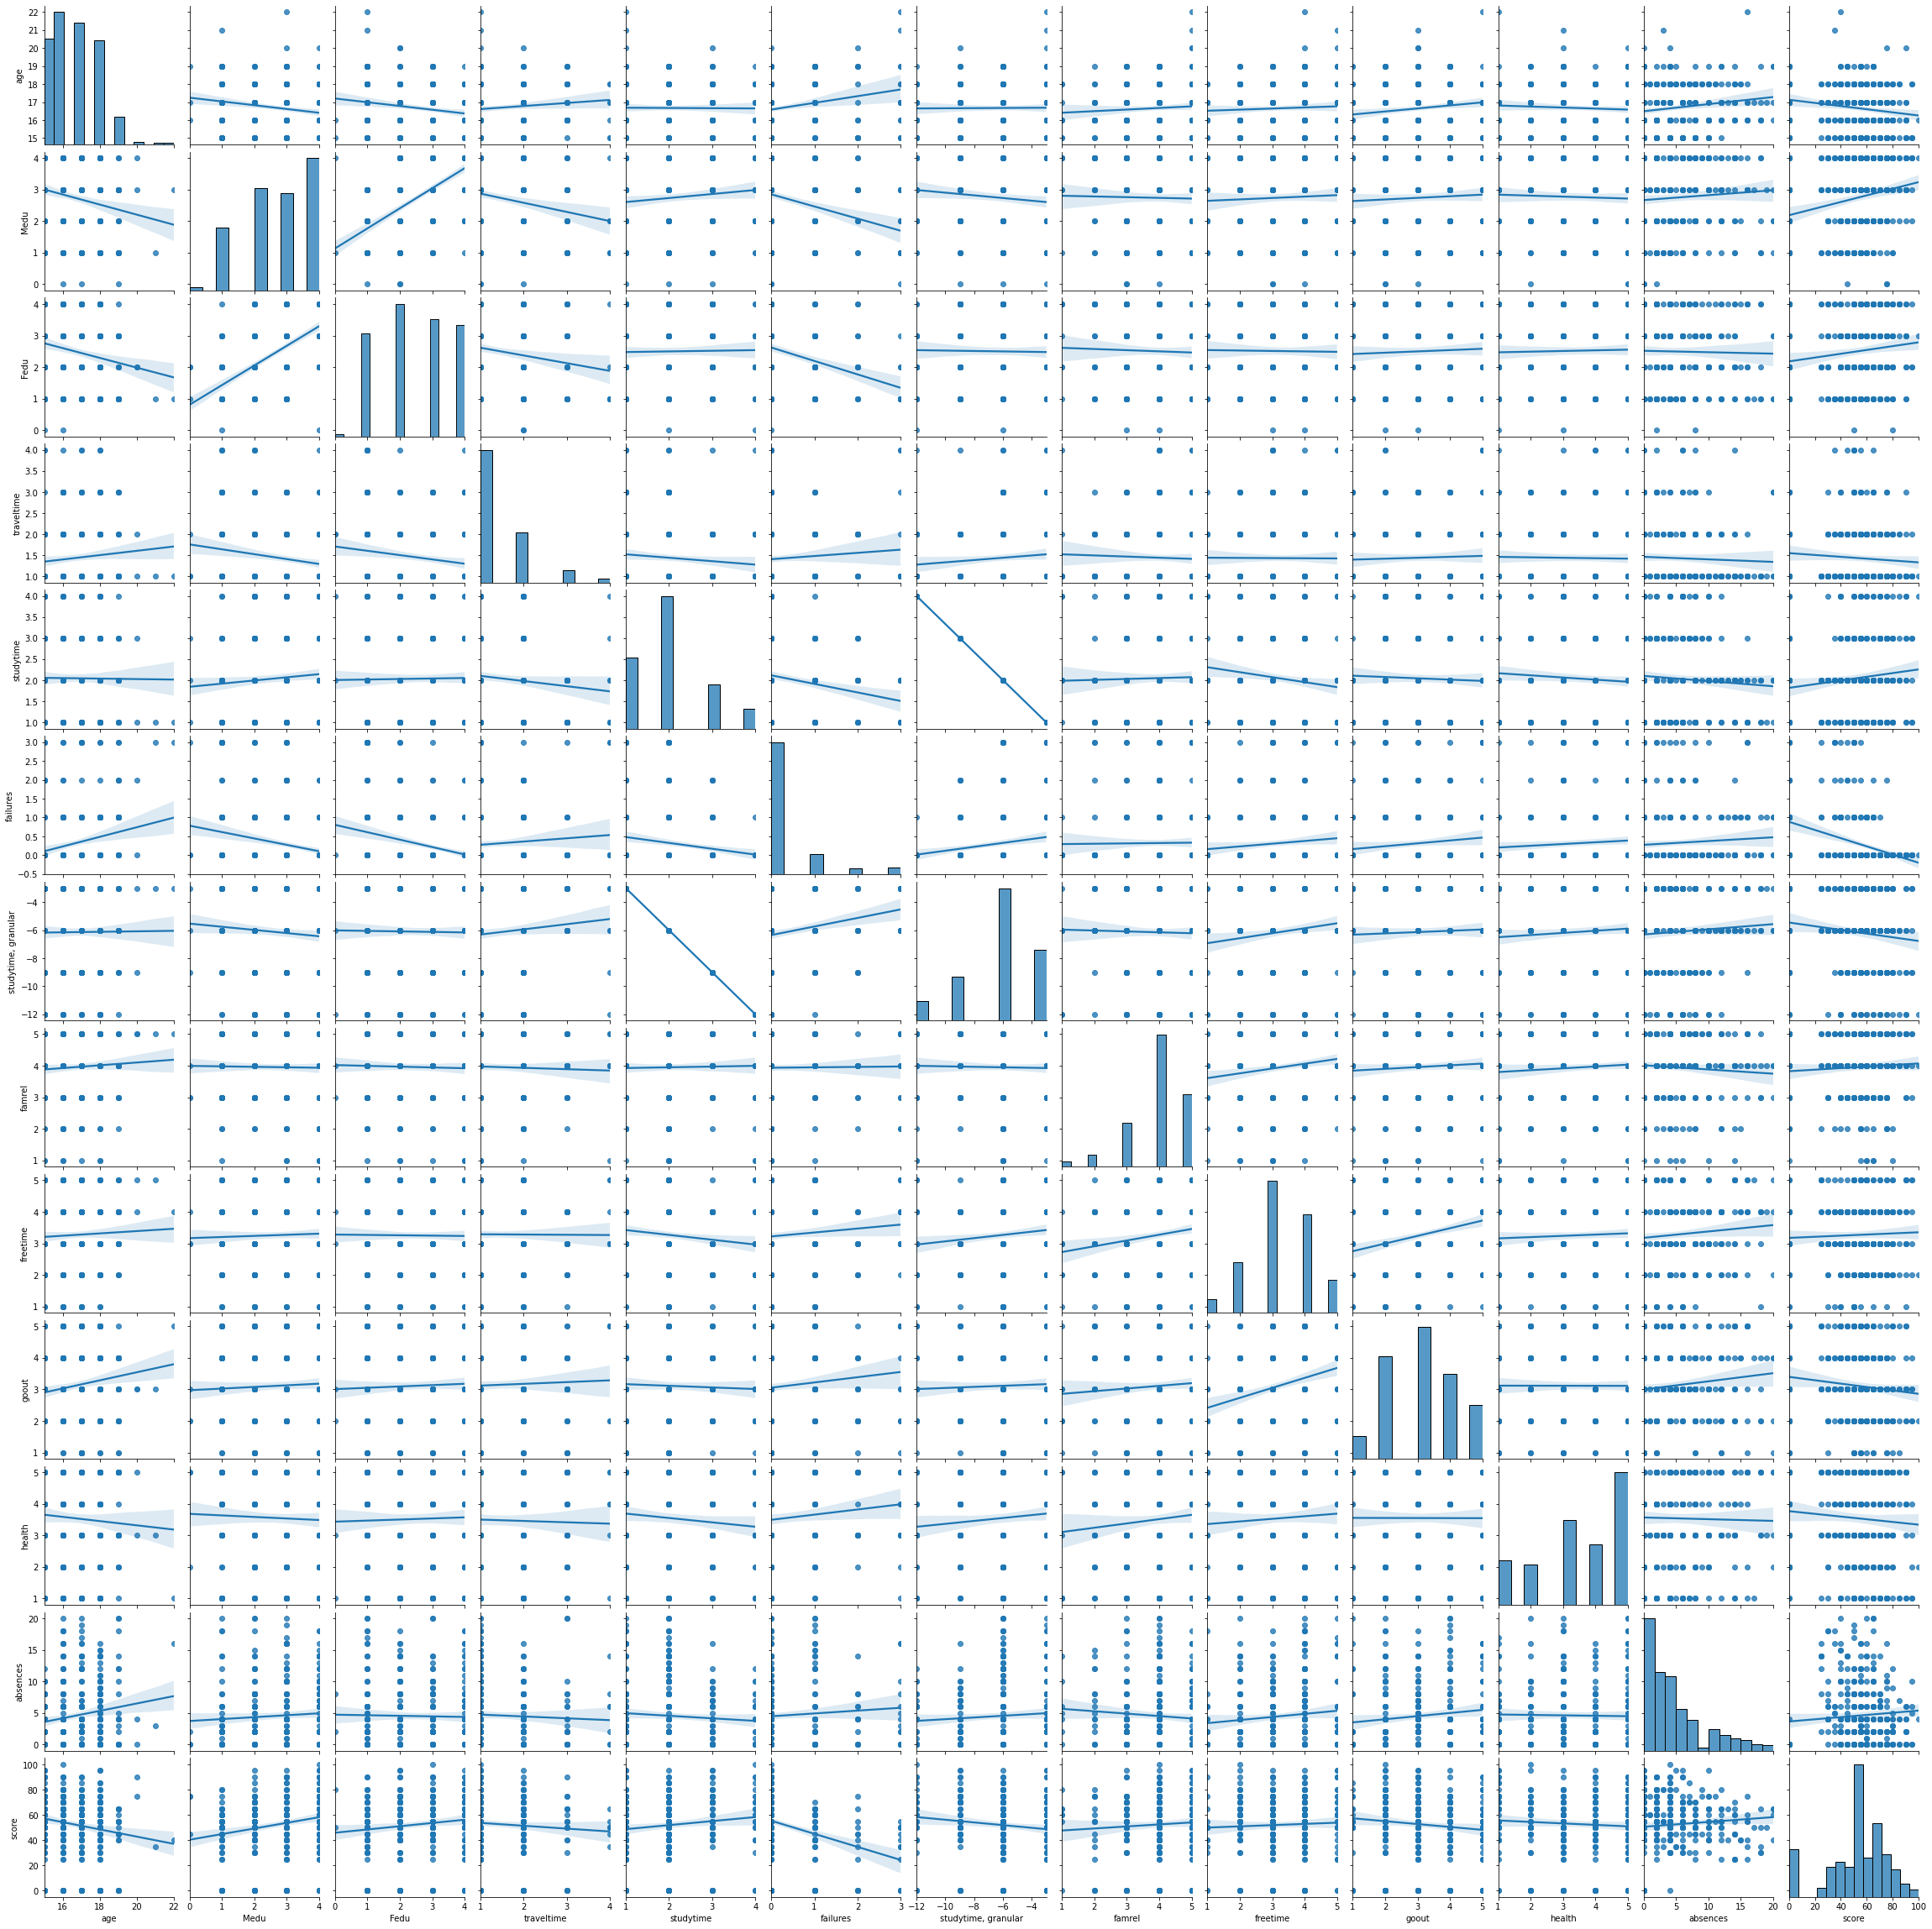

In [35]:
sns.pairplot(df, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [36]:
df22 = df.corr()
df22

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.182949,-0.179096,0.093321,-0.008634,0.217645,0.008634,0.062476,0.047375,0.146565,-0.061557,0.151881,-0.158053
Medu,-0.182949,1.000000,0.629099,-0.183697,0.097849,-0.255588,-0.097849,-0.018171,0.039720,0.051264,-0.038857,0.069016,0.216340
Fedu,-0.179096,0.629099,1.000000,-0.158145,0.015616,-0.289433,-0.015616,-0.030520,-0.012494,0.041891,0.026787,-0.020102,0.124798
traveltime,0.093321,-0.183697,-0.158145,1.000000,-0.100115,0.080707,0.100115,-0.034237,-0.005917,0.035006,-0.021322,-0.042113,-0.070770
studytime,-0.008634,0.097849,0.015616,-0.100115,1.000000,-0.177974,-1.000000,0.022310,-0.134612,-0.039986,-0.084221,-0.070669,0.118383
failures,0.217645,-0.255588,-0.289433,0.080707,-0.177974,1.000000,0.177974,0.011241,0.095059,0.112493,0.086826,0.067064,-0.335431
"studytime, granular",0.008634,-0.097849,-0.015616,0.100115,-1.000000,0.177974,1.000000,-0.022310,0.134612,0.039986,0.084221,0.070669,-0.118383
famrel,0.062476,-0.018171,-0.030520,-0.034237,0.022310,0.011241,-0.022310,1.000000,0.166615,0.068931,0.089272,-0.071447,0.062831
freetime,0.047375,0.039720,-0.012494,-0.005917,-0.134612,0.095059,0.134612,0.166615,1.000000,0.276730,0.057498,0.099445,0.041546
goout,0.146565,0.051264,0.041891,0.035006,-0.039986,0.112493,0.039986,0.068931,0.276730,1.000000,-0.001817,0.113032,-0.110910


Итак можем сказать что чем меньше внеучебных неудач, тем выше оценки, \
чем меньше проведенного времени с друзьями -\
тем выше оценки.\
Также небольшая связь есть между образованием матери и оценками и присутствием на занятиях. 
Также влияет время проведеное на учебу помимо школы - чем меньше - тем ниже оценки. 

<AxesSubplot:>

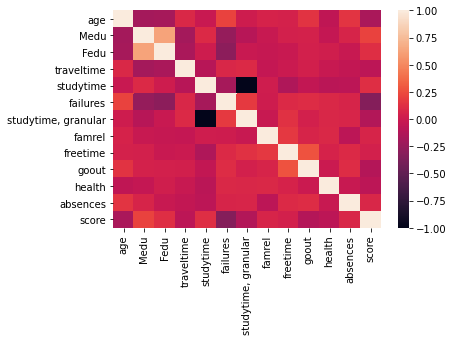

In [37]:
corr = df.corr(method="pearson")
sns.heatmap(corr)

Связь между двумя переменными может быть следующей - когда значения одной переменной убывают,\
значения другой возрастают. Это и показывает отрицательный коэффициент корреляции. \
Про такие переменные говорят, что они отрицательно коррелированы.

## Анализ номинативных переменных

In [38]:
categorical_1 = df[['Mjob', 'Fjob', 'reason', 'guardian']]
categorical_1

,Mjob,Fjob,reason,guardian
0,at_home,teacher,course,mother
1,at_home,other,course,father
2,at_home,other,other,mother
3,health,None,home,mother
4,other,other,home,father
...,...,...,...,...
389,other,other,course,mother
391,services,services,course,mother
392,other,other,course,None
393,services,other,course,mother


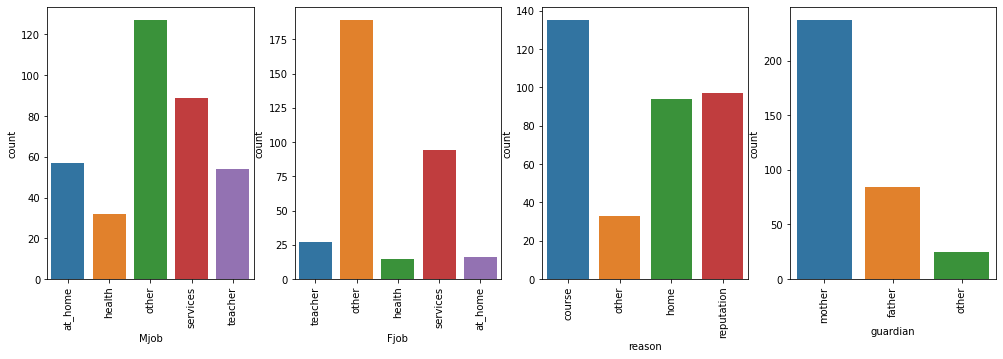

In [39]:
fig, ax = plt.subplots(1, 4, figsize=(17, 5))
for variable, subplot in zip(categorical_1, ax.flatten()):
    sns.countplot(df[variable], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)


Как видим, много профессий родителей необозначено, \
так как их очень много а при заполнении анкеты были даны несколько категорий.
можем только предположить, что у учителей дети учаться лучше:


In [43]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:15])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

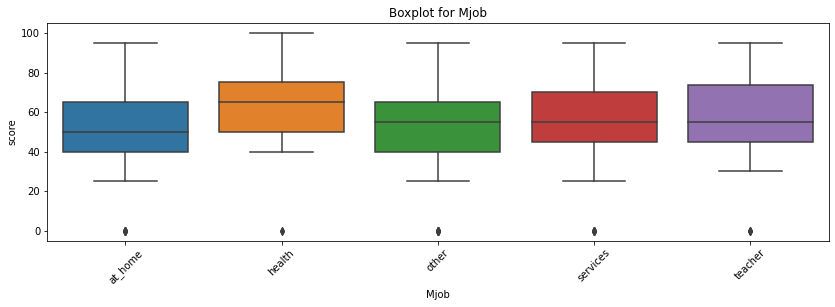

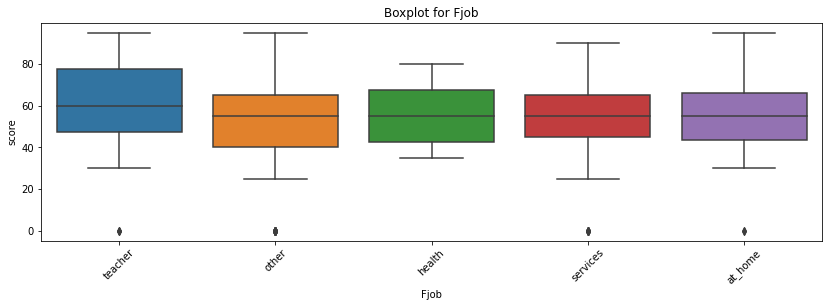

In [41]:
for col in ['Mjob', 'Fjob']:
    get_boxplot(col)

Определенно можем сказать, что у учителей дети получают выше оценки. 

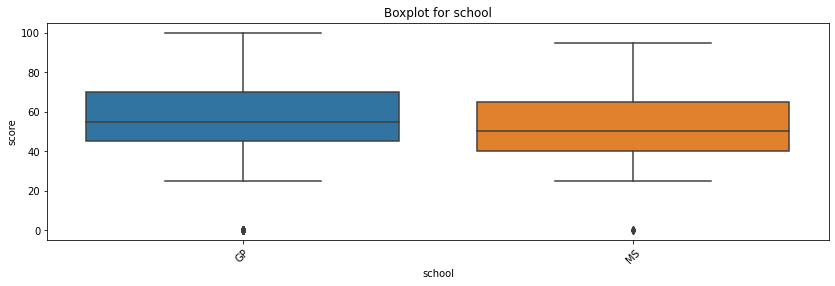

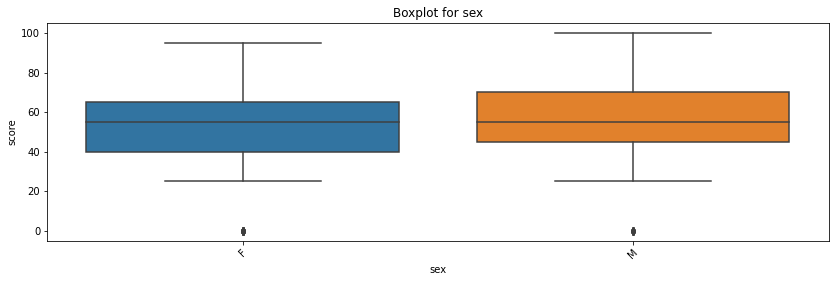

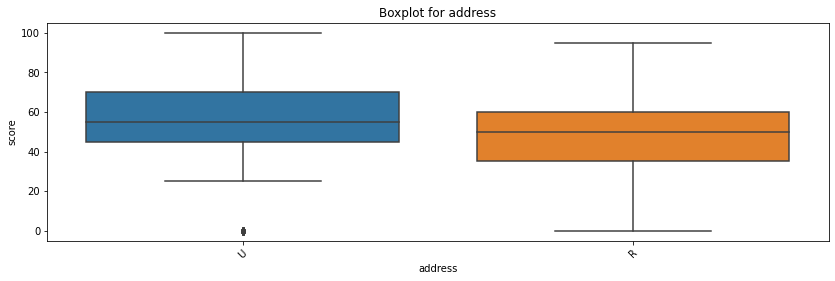

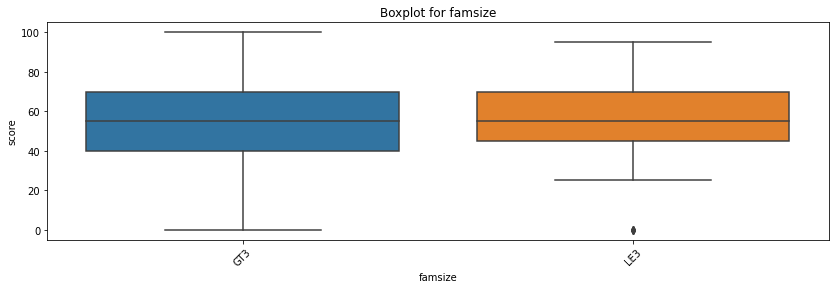

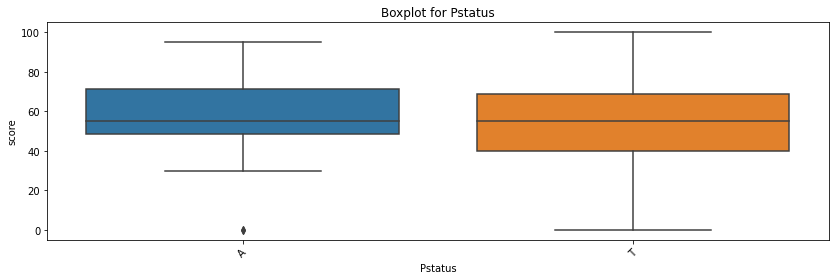

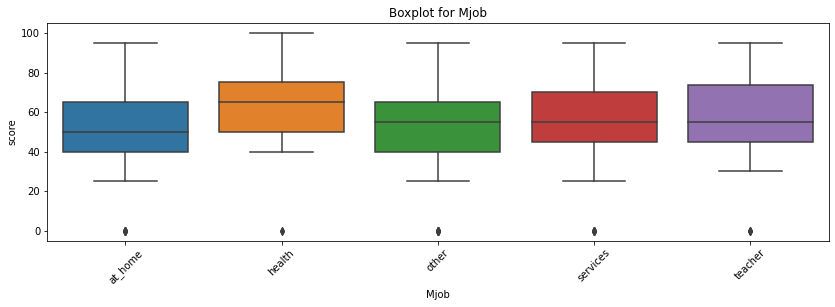

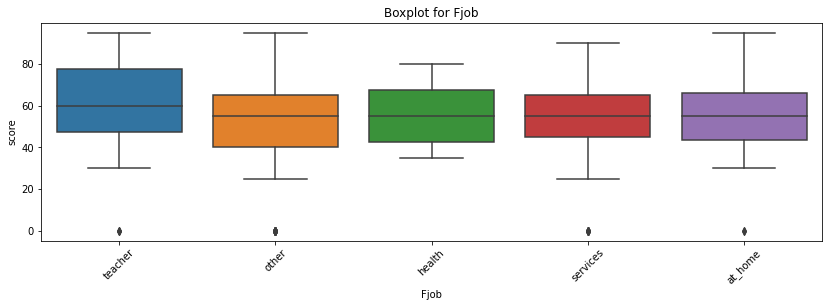

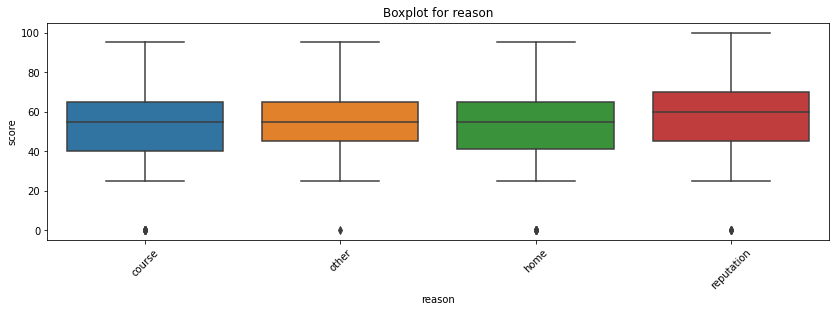

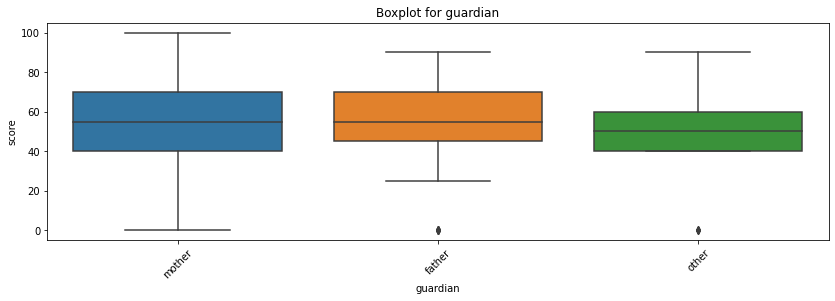

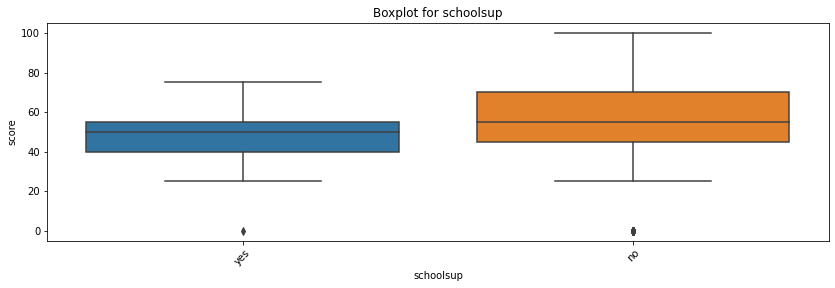

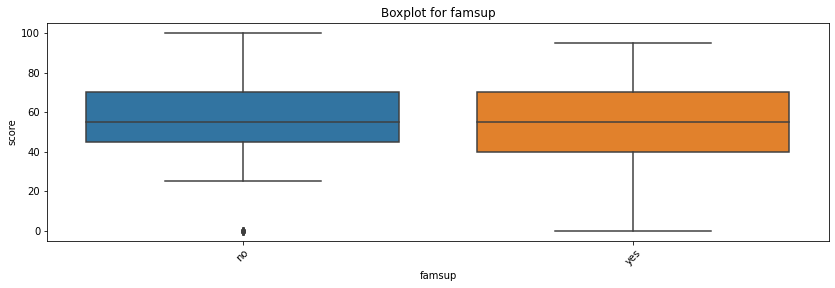

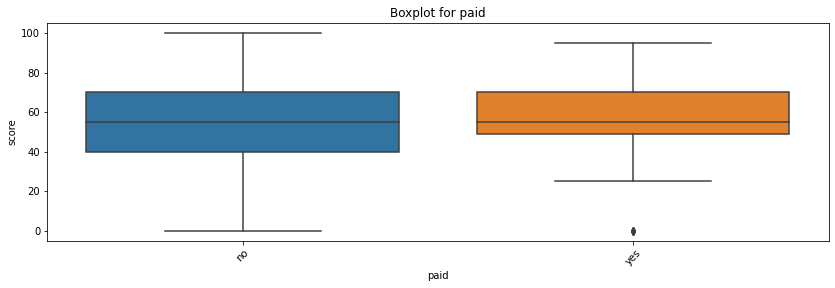

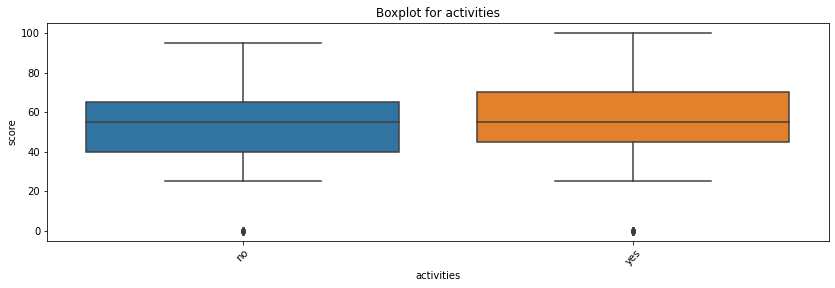

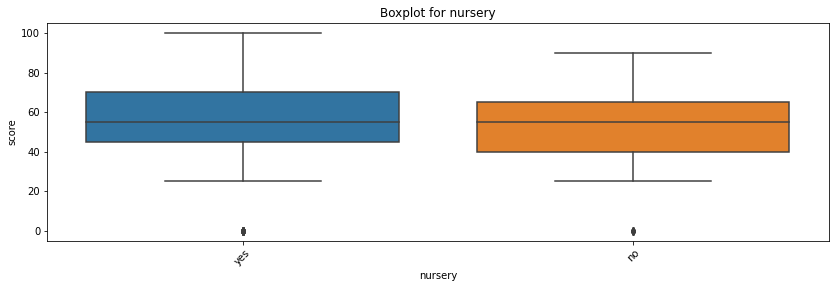

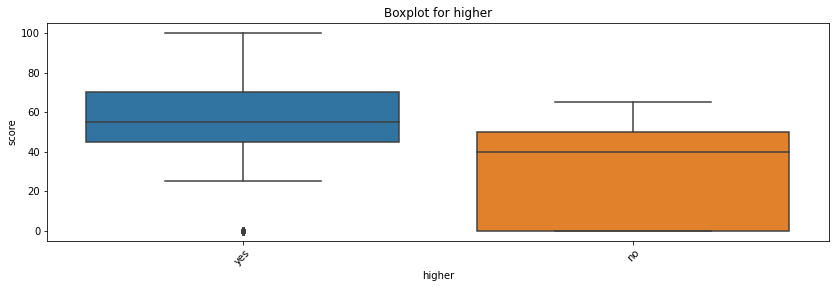

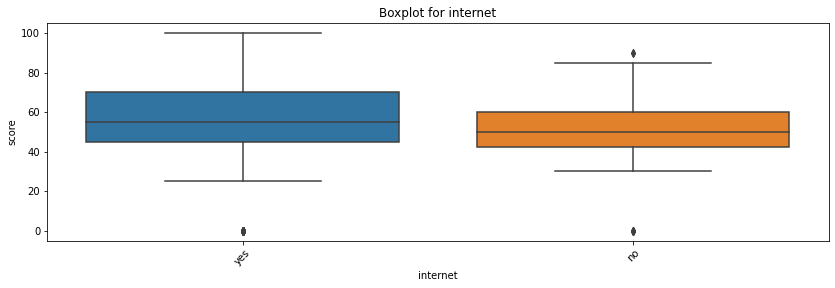

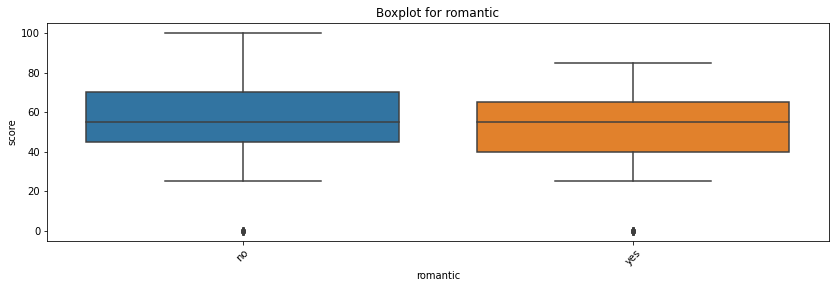

In [44]:
for col in categorical:
    get_boxplot(col)

In [45]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [46]:
for col in categorical:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


In [47]:
#student_model = df[df.score<df.score.mean()] 
student_model = df[['studytime','failures','goout','sex','address','Mjob','absences','paid','higher','romantic']]
student_model.tail(15)

,studytime,failures,goout,sex,address,Mjob,absences,paid,higher,romantic
379,2.0,0.0,4.0,F,R,at_home,17.0,yes,yes,no
380,2.0,0.0,4.0,M,U,teacher,4.0,yes,yes,None
381,1.0,0.0,3.0,M,R,other,5.0,no,yes,yes
382,2.0,0.0,3.0,M,U,other,2.0,no,None,no
383,1.0,1.0,2.0,M,R,other,0.0,no,yes,no
384,1.0,1.0,3.0,M,R,other,14.0,None,yes,no
385,3.0,0.0,3.0,F,R,at_home,2.0,yes,yes,no
386,1.0,0.0,3.0,F,R,teacher,7.0,yes,yes,yes
387,3.0,1.0,2.0,F,R,services,0.0,no,yes,no
388,2.0,0.0,4.0,F,U,teacher,0.0,yes,yes,no


# Выводы

Итак, в результате EDA для анализа условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике были получены следующие выводы:
    1.В данных достаточно мало пустых значений, только столбец Pstatus было не заполнено 11 процентов случаев и столбец paid не заполнен 10 процентов случаев.
    2.Выбросы найдены только в столбцах образования отца, отсутствии на занятиях и семейны отношениях в нескольких случаях  что позволяет сделать вывод о том, что данные достаточно чистые.
    3.Так как в столбцах о работе родителей большинство случаев не указана профессия, можно сказать что этот фактор не влияет на оценки учащихся. 
    4.Отрицательная кореляция между внеучебными неудачами и оценками учащихся говорит о том что неудачи имеют негативное влияние на оценки.
    5. Самые важные параметры, которые предлагается использовать в дальнейшем для построения модели: 'studytime','failures','goout','sex','address','Mjob','absences','paid','higher','romantic'.
    (но на мой взгляд я бы исключила стольбци 'sex','address','Mjob' и включила 'guardian', 'schoolsup'  для постороения модели .)